In [ ]:
#inialization set up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading videodetails file
df_video_details=pd.read_csv('VideoDetails.csv')

In [ ]:
df_video_details.info()

In [3]:
#Reading videostarted file
df_video_started=pd.read_csv('VideoStarted.csv')

In [4]:
# converting to standard timestamp
df_video_started['Date'] = df_video_started['Date'].apply(str)
df_video_started['Date']=pd.to_datetime(df_video_started['Date'], format='%Y%m%d', errors='ignore')
df_video_started['Timestamp']=pd.to_datetime(df_video_started.Date) + pd.to_timedelta(df_video_started.Minute_Of_Day, unit='m') + pd.to_timedelta(df_video_started.Second, unit='s')
df_video_started.drop(['Date','Minute_Of_Day','Second'],axis=1,inplace=True)

In [ ]:
df_video_started

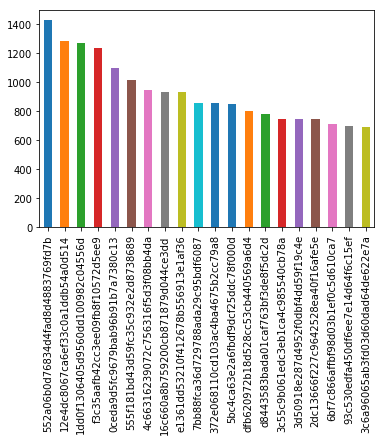

In [5]:
df_video_started.UserId.value_counts().head(20).plot('bar') 

In [8]:
temp=df_video_started['UserId'].value_counts()
userid=temp[(temp.values >50) & (temp.values <150)].index.tolist()

In [9]:
# converting userid list to datframe
useridu = pd.DataFrame({'UserId':userid})
# selecting only 100 rows
useridun = useridu[:100]
useridun

,UserId
0,0d5fea8db4183c66898b17bf2f466d2f
1,aa18c780981c8ed0d949328dbe29cd62
2,8b26b87bc40cafbfd9dbae16710330a6
3,6bfd2ce12162d39c635b9df4b42c874a
4,4029f5c0c1836cba8ce07427ab5d9b5a
5,0eb7d34757413d3b7780e77cd73a5f05
6,a3083f8959b4922ad9cd61ae05115fcc
7,ad4b2c1cf6ceaac9f41e32614f95bfb7
8,2acb674c259dca5eb541d86ba0d9b122
9,d88419f59b0016c607ff35c7710de25c


In [10]:
# merging with 100 unique user ids
merging = pd.merge(useridun,df_video_started,how='left',on='UserId')
merging

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,Timestamp
0,0d5fea8db4183c66898b17bf2f466d2f,57,Football,linear,Channels,1,1,1,1a729c215f0c08cc9fedb32bc272b556,2017-04-12 08:13:12
1,0d5fea8db4183c66898b17bf2f466d2f,57,Other Sports (General),linear,Channels,1,1,1,d5b0a8692cbbe447fd9014382047ad66,2017-04-12 08:16:52
2,0d5fea8db4183c66898b17bf2f466d2f,57,Football,linear,Channels,1,1,1,1a729c215f0c08cc9fedb32bc272b556,2017-04-12 08:17:56
3,0d5fea8db4183c66898b17bf2f466d2f,57,Football,linear,Channels,1,1,1,1a729c215f0c08cc9fedb32bc272b556,2017-04-12 08:19:40
4,0d5fea8db4183c66898b17bf2f466d2f,57,Other Sports (General),linear,Channels,1,1,1,d5b0a8692cbbe447fd9014382047ad66,2017-04-12 08:23:56
5,0d5fea8db4183c66898b17bf2f466d2f,57,Other Sports (General),linear,Channels,1,1,1,d5b0a8692cbbe447fd9014382047ad66,2017-04-12 08:27:52
6,0d5fea8db4183c66898b17bf2f466d2f,57,Sports Magazine,linear,Channels,1,1,1,2dd067e7a439ac5a433bb7aa7eec6b7b,2017-04-12 13:08:52
7,0d5fea8db4183c66898b17bf2f466d2f,57,Other Sports (General),linear,Channels,1,1,1,1a729c215f0c08cc9fedb32bc272b556,2017-04-12 13:55:24
8,0d5fea8db4183c66898b17bf2f466d2f,57,Football,linear,Channels,1,1,1,1a729c215f0c08cc9fedb32bc272b556,2017-04-12 18:58:20
9,0d5fea8db4183c66898b17bf2f466d2f,57,Football,linear,Channels,1,1,1,d5b0a8692cbbe447fd9014382047ad66,2017-04-12 19:19:28


In [14]:
gp=merging.groupby('UserId')['VideoId'].value_counts().index


In [15]:
for i in gp:
  print(i)

('00ee914cf7e4de6e8aa1c37c8dfc828b', 'dba2bfaac0b48183b31d9328d3d71ba5')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '66acb1c6dfce53ba24a5662e5d9c1253')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '826e990372447fbeb52c655d47ada7af')
('00ee914cf7e4de6e8aa1c37c8dfc828b', 'b7caed763d2ce4140431c0fce607c1b2')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '3e808ec9a886535dc07264c0c692d920')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '963f72c05e44405637e3cd049689c8dd')
('00ee914cf7e4de6e8aa1c37c8dfc828b', 'b92cb0381d7be6d452b3e8168c5d9f41')
('00ee914cf7e4de6e8aa1c37c8dfc828b', 'c3368fb39af6c4c785d60d8a736db28f')
('00ee914cf7e4de6e8aa1c37c8dfc828b', 'ef2f8cc077424405c8d09031ad76ef92')
('00ee914cf7e4de6e8aa1c37c8dfc828b', 'efd2fd19defaf4fa2416914f91948ddc')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '0499f7487eff13f015d3cf6f1b6092cd')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '10d43f92d0b839bf078e9ececfcee4ce')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '39a0126f9fcab5399b6887570e808cea')
('00ee914cf7e4de6e8aa1c37c8dfc828b', '73ff9d75eca81

('27687e0af314b54c467318666e0f26a2', 'efbb278df80234298a67e099709988d5')
('27687e0af314b54c467318666e0f26a2', 'f0961889cad44180693b249ad0718b78')
('27687e0af314b54c467318666e0f26a2', 'f28359e4ba3569bc215b29a1a165ddab')
('27687e0af314b54c467318666e0f26a2', 'f549fc236527c09515352eb5bed674a7')
('27687e0af314b54c467318666e0f26a2', 'f56169686326972919b151a54aff72f3')
('27687e0af314b54c467318666e0f26a2', 'f78d083ce61a5189dea510f078ca503b')
('27687e0af314b54c467318666e0f26a2', 'f8ac4882df68a57a0f65633390524692')
('27687e0af314b54c467318666e0f26a2', 'fb017e087fb7eac6523e5b37149c9341')
('27687e0af314b54c467318666e0f26a2', 'fd027d8039add4c3dec1691b08e3250a')
('2a3c75df8d21a448f3147fd4bd096713', '2dd067e7a439ac5a433bb7aa7eec6b7b')
('2a3c75df8d21a448f3147fd4bd096713', '73c2d761c22f17d2278a0a35ef99cd9d')
('2a3c75df8d21a448f3147fd4bd096713', '815670e60588e65c216c5bf9a40b6418')
('2a3c75df8d21a448f3147fd4bd096713', 'bc4721988d4f8b7120296138c92a2fe5')
('2a3c75df8d21a448f3147fd4bd096713', 'f497890b23030

('420f199a649f5f6bd3d61aa3e5ca665d', 'e6ea7e407888ec088e91bafe475c91d0')
('420f199a649f5f6bd3d61aa3e5ca665d', '5c0f1f6e255af1a4b8f61f778c0529bd')
('420f199a649f5f6bd3d61aa3e5ca665d', '7a0f73742d8e4b90b091fbf8e5c2c0ea')
('420f199a649f5f6bd3d61aa3e5ca665d', 'fd027d8039add4c3dec1691b08e3250a')
('420f199a649f5f6bd3d61aa3e5ca665d', 'a4a773531e35757badfe759f6d69e7a7')
('420f199a649f5f6bd3d61aa3e5ca665d', 'b00e779e59ff4968397335d0bd64f7cf')
('420f199a649f5f6bd3d61aa3e5ca665d', '41b10e076f1f6a76c71d7d53dfbbe43c')
('420f199a649f5f6bd3d61aa3e5ca665d', '34c6ea89ebb5e6d01cfd5e830745a87d')
('420f199a649f5f6bd3d61aa3e5ca665d', '3868afb357f970a2e930297df640f04e')
('420f199a649f5f6bd3d61aa3e5ca665d', 'dad5c43748b229667804b2bcd8a40bf5')
('420f199a649f5f6bd3d61aa3e5ca665d', '098ec9bab702390fc3077023f20eeed4')
('420f199a649f5f6bd3d61aa3e5ca665d', '1104ddcfe185e06d55bd8fa0b5d84c31')
('420f199a649f5f6bd3d61aa3e5ca665d', '2dd067e7a439ac5a433bb7aa7eec6b7b')
('420f199a649f5f6bd3d61aa3e5ca665d', '8d4e373315349

('60e1803361321b88054225eccb2d6d88', 'ce9a02681bc1524243036242ec33baab')
('60e1803361321b88054225eccb2d6d88', 'd0e4312168b1cd152da3a172f69a020d')
('60e1803361321b88054225eccb2d6d88', 'e583e05edeea6656ef0b53c281dc2ee4')
('60e1803361321b88054225eccb2d6d88', 'f2483e144366b18eef1a7bf405424d0d')
('60e1803361321b88054225eccb2d6d88', 'fb017e087fb7eac6523e5b37149c9341')
('60e1803361321b88054225eccb2d6d88', '07cb62332507d535a8777fe85b38cbc3')
('60e1803361321b88054225eccb2d6d88', '07e44efc6d78c896b69e87e238bee96e')
('60e1803361321b88054225eccb2d6d88', '0d55fff472d6d0567e222a193fee491c')
('60e1803361321b88054225eccb2d6d88', '18bda92b103cba3b6dd591b58f879add')
('60e1803361321b88054225eccb2d6d88', '213afe7db858f037289e5d4ae9406666')
('60e1803361321b88054225eccb2d6d88', '2d9c6017919fcfb6d285636fa2ce9b3f')
('60e1803361321b88054225eccb2d6d88', '2da816ea3073688f6817d96aea41eec3')
('60e1803361321b88054225eccb2d6d88', '342acab555535eea00ffb6fdfa032399')
('60e1803361321b88054225eccb2d6d88', '3868afb357f97

('7de96d05143872c08254eb81931d1c04', '6db96a3c1348990660f624ba5d4b0996')
('7de96d05143872c08254eb81931d1c04', '6e82eecf8fd95e50d496289c3ff9db85')
('7de96d05143872c08254eb81931d1c04', '73c2d761c22f17d2278a0a35ef99cd9d')
('7de96d05143872c08254eb81931d1c04', '815670e60588e65c216c5bf9a40b6418')
('7de96d05143872c08254eb81931d1c04', '826e990372447fbeb52c655d47ada7af')
('7de96d05143872c08254eb81931d1c04', '8c2001b057dd9d56924cf3eec650534d')
('7de96d05143872c08254eb81931d1c04', '8cc7fc477de35fb57128dc7a8d75245c')
('7de96d05143872c08254eb81931d1c04', '908d3f78a8428fa5e00a161ba4a5b424')
('7de96d05143872c08254eb81931d1c04', '91d64c114c8179f58a33963d8dffa739')
('7de96d05143872c08254eb81931d1c04', '92c56616ab5e6fe5095cfdd69c6bc167')
('7de96d05143872c08254eb81931d1c04', '961193cdc2992c1d9def0b52259a5574')
('7de96d05143872c08254eb81931d1c04', '963f72c05e44405637e3cd049689c8dd')
('7de96d05143872c08254eb81931d1c04', '975cf3b536692be81312268713bd747a')
('7de96d05143872c08254eb81931d1c04', '9ee49a1921661

('8b26b87bc40cafbfd9dbae16710330a6', '21526ec273ad7b6d230822f32d685fd1')
('8b26b87bc40cafbfd9dbae16710330a6', '2161c4b0fdb2ed80c8f6e7349b7f0141')
('8b26b87bc40cafbfd9dbae16710330a6', '2d9c6017919fcfb6d285636fa2ce9b3f')
('8b26b87bc40cafbfd9dbae16710330a6', '31e28e37fcdbc270342a74d8397e1663')
('8b26b87bc40cafbfd9dbae16710330a6', '34c6ea89ebb5e6d01cfd5e830745a87d')
('8b26b87bc40cafbfd9dbae16710330a6', '38611fa80c122a28be1e98c3e6fbc698')
('8b26b87bc40cafbfd9dbae16710330a6', '417aa8382864b7b251716c5f052714ec')
('8b26b87bc40cafbfd9dbae16710330a6', '4201bbf9f656e5f5cfe7c569bea4dd47')
('8b26b87bc40cafbfd9dbae16710330a6', '4a353f29d81c4467f3468da07bbd2de2')
('8b26b87bc40cafbfd9dbae16710330a6', '4bc96fd3ef65a82c7f6b13f09c61a75b')
('8b26b87bc40cafbfd9dbae16710330a6', '4c9dae67fda32b28f10a129247db0177')
('8b26b87bc40cafbfd9dbae16710330a6', '4ca754d4d4083bb6e0d597a568950b11')
('8b26b87bc40cafbfd9dbae16710330a6', '4d749fc7dbd2cbde1db2ce63eef7fa5e')
('8b26b87bc40cafbfd9dbae16710330a6', '4ecac0073ba8a

('ad4b2c1cf6ceaac9f41e32614f95bfb7', '2933795edc638ee399d9bb34de733095')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', '2b977caf5756202868adfc04154a5a21')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', '2cbed9e716993399ac4975951a29bfa3')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', '3f4767ba0a25245d54eeb09c081b1895')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', '4d749fc7dbd2cbde1db2ce63eef7fa5e')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', '56390f0758ad82e6ba973fc3581cff62')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', '5af692aae08dd3bd9e3d1affbdb7241c')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', '83b96432c39cd3ef7b67e550e85e8bfc')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', 'a87e1e841c5714b99e86f66b4f917264')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', 'c0702c49955f00b1f80f17f1e730772e')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', 'cb3a458166788ba0237d77c9002ca3f0')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', 'cc98c1286c53ada645d6387f96e94520')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', 'e935c01af95d1788f292f7bfa43c1c3b')
('ad4b2c1cf6ceaac9f41e32614f95bfb7', 'faef0639cdbcc

('cad8b273c7d4a463ff34c7a4e69f18ba', '07d09bdace176bbded729586a37191e9')
('cad8b273c7d4a463ff34c7a4e69f18ba', '0d55fff472d6d0567e222a193fee491c')
('cad8b273c7d4a463ff34c7a4e69f18ba', '0fbc6abfabb9e1e69da8970cc18bc08f')
('cad8b273c7d4a463ff34c7a4e69f18ba', '18eba4ebf12d852d84116576ba3a25e5')
('cad8b273c7d4a463ff34c7a4e69f18ba', '2085275fc40d1122a2c5e21c35367167')
('cad8b273c7d4a463ff34c7a4e69f18ba', '20e4787e72962583f71e3d7c9d46a481')
('cad8b273c7d4a463ff34c7a4e69f18ba', '2161c4b0fdb2ed80c8f6e7349b7f0141')
('cad8b273c7d4a463ff34c7a4e69f18ba', '244f7fc22f43f3adc4ae11bec158a731')
('cad8b273c7d4a463ff34c7a4e69f18ba', '2c666a332447dca028d3d76056ae37b2')
('cad8b273c7d4a463ff34c7a4e69f18ba', '339da5b412a8e507e7a2e51671c2b74e')
('cad8b273c7d4a463ff34c7a4e69f18ba', '35b114e3464580b645e755d0f8af317a')
('cad8b273c7d4a463ff34c7a4e69f18ba', '37f1d3b3a715b78a3a422cb0c1fdd484')
('cad8b273c7d4a463ff34c7a4e69f18ba', '3e39cccd1b57590a9ee3af3b02d8f00e')
('cad8b273c7d4a463ff34c7a4e69f18ba', '42ddf26a2fd84

('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'f6c7712cb7bfc4cc08973e9d869e5ef7')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'a4a773531e35757badfe759f6d69e7a7')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'e6ea7e407888ec088e91bafe475c91d0')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', '07cb62332507d535a8777fe85b38cbc3')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', '2f4cfdd071d8bf6df6900fcc624f8cc5')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', '509bef28c5c57ce6e73a45b7776e3827')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'a76536e4fb7706043493cabd35b68232')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'b00e779e59ff4968397335d0bd64f7cf')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'fb017e087fb7eac6523e5b37149c9341')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', '1907e803fecea7e4c0b1e09509566146')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', '27fd64204fc3fce0bf858d2d697fe2d8')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'c0702c49955f00b1f80f17f1e730772e')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', 'ee9c2ed03e612f49be7f0b1e16b3d21a')
('ebeace6ee2fb02bc4f8aef3afce5f6b3', '095d7d3e21425

In [16]:
gp2=merging.groupby('VideoId')['Timestamp'].value_counts().index

In [17]:
for i in gp2:
  print(i)

('005f0e9f7b0f110634f3b25711d8e4c2', Timestamp('2017-01-29 22:13:52'))
('005f0e9f7b0f110634f3b25711d8e4c2', Timestamp('2017-01-29 22:14:12'))
('005f0e9f7b0f110634f3b25711d8e4c2', Timestamp('2017-01-28 14:19:44'))
('0069536be5ac83d7ab75e355c1509f9d', Timestamp('2017-03-28 07:00:56'))
('0069536be5ac83d7ab75e355c1509f9d', Timestamp('2017-04-24 22:18:32'))
('00d546e1433516c0ab83d1511ee638bc', Timestamp('2017-04-16 20:09:00'))
('00d546e1433516c0ab83d1511ee638bc', Timestamp('2017-05-04 11:35:44'))
('00f64ef90b339899b6854a7118d497de', Timestamp('2017-05-22 01:28:24'))
('00feba0aa20aa7f5a388ef6196025051', Timestamp('2017-01-06 09:53:08'))
('00feba0aa20aa7f5a388ef6196025051', Timestamp('2017-01-06 10:00:00'))
('00feba0aa20aa7f5a388ef6196025051', Timestamp('2017-01-06 11:53:16'))
('00feba0aa20aa7f5a388ef6196025051', Timestamp('2017-03-30 19:05:48'))
('00feba0aa20aa7f5a388ef6196025051', Timestamp('2017-04-21 04:33:56'))
('016557fc4a327d5359620b2873d46b26', Timestamp('2017-04-01 18:54:44'))
('0165

('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:26:12'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:32:24'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:33:24'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:39:36'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:40:52'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:42:16'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:43:00'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:44:04'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:45:04'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:46:08'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:48:12'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:50:24'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:51:36'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-06-02 15:55:48'))
('1a72

('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 09:44:52'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 12:03:56'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 13:04:00'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 13:29:48'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 14:00:20'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 18:23:40'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 18:23:56'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 21:04:08'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-08 22:31:32'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-09 13:40:48'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-09 21:03:44'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-09 22:50:28'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-10 20:23:44'))
('1a729c215f0c08cc9fedb32bc272b556', Timestamp('2017-05-10 21:47:52'))
('1a72

('244f7fc22f43f3adc4ae11bec158a731', Timestamp('2017-04-14 19:14:12'))
('244f7fc22f43f3adc4ae11bec158a731', Timestamp('2017-04-30 10:10:04'))
('244f7fc22f43f3adc4ae11bec158a731', Timestamp('2017-05-02 01:21:40'))
('244f7fc22f43f3adc4ae11bec158a731', Timestamp('2017-05-10 00:04:40'))
('24c5bfac56366357ae7393474dc71193', Timestamp('2017-03-11 12:09:04'))
('24c6d0fc9315a5d14e932122d23c0178', Timestamp('2017-04-28 11:36:36'))
('24c6d0fc9315a5d14e932122d23c0178', Timestamp('2017-04-28 09:59:32'))
('24dc653a1bdef0c093f22b8292988d90', Timestamp('2017-02-16 22:19:28'))
('250277bf06dcd37980c582faf8631faa', Timestamp('2017-04-15 23:02:20'))
('250277bf06dcd37980c582faf8631faa', Timestamp('2017-04-23 06:51:36'))
('250277bf06dcd37980c582faf8631faa', Timestamp('2017-04-23 21:35:12'))
('250277bf06dcd37980c582faf8631faa', Timestamp('2017-04-27 17:38:04'))
('250277bf06dcd37980c582faf8631faa', Timestamp('2017-05-15 16:21:08'))
('2570d8ff6808fcdcfb9c761d74c05e83', Timestamp('2017-05-30 07:27:12'))
('2570

('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-06-10 09:46:16'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-06-12 00:18:04'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-06-12 02:35:08'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-06-12 22:26:32'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-01-06 17:08:08'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-01-06 17:08:16'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-01-16 01:24:24'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-01-21 04:59:16'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-02-12 14:23:24'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-02-12 15:04:12'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-02-12 15:15:08'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-02-19 18:44:12'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-03-09 21:31:04'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-03-09 21:35:04'))
('2dd0

('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 15:20:12'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 15:52:40'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 16:01:44'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 17:30:40'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 17:35:20'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 17:37:00'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 18:08:36'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 18:09:00'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 18:33:44'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 18:43:40'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 19:12:44'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 19:42:00'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 19:44:32'))
('2dd067e7a439ac5a433bb7aa7eec6b7b', Timestamp('2017-05-06 19:54:36'))
('2dd0

('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 06:33:00'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 06:46:00'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 07:06:28'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 07:06:44'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 07:11:08'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 07:16:56'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 07:30:08'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 07:48:48'))
('335f31dec5a2824868e5cf24df6fc691', Timestamp('2017-06-06 12:33:00'))
('33998da949b99f17a8716187515c3696', Timestamp('2017-05-06 00:18:52'))
('33998da949b99f17a8716187515c3696', Timestamp('2017-05-06 19:00:48'))
('339da5b412a8e507e7a2e51671c2b74e', Timestamp('2017-05-07 00:43:48'))
('339da5b412a8e507e7a2e51671c2b74e', Timestamp('2017-05-14 00:53:16'))
('33b193ebf7deeb315ea76f3996d9a316', Timestamp('2017-02-21 10:27:12'))
('33b5

('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 01:53:08'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 01:54:16'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 01:54:56'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 01:57:52'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 01:58:28'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 02:05:28'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 02:05:36'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 02:16:00'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 02:19:24'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 02:21:00'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 02:21:36'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 09:32:36'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 09:34:24'))
('3be9d3729cf2391d5feecdea0f2c4c66', Timestamp('2017-03-31 09:35:20'))
('3be9

('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-06 11:13:48'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-07 00:22:08'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-07 01:17:48'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-07 21:59:00'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-07 22:39:12'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-09 01:38:52'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-10 10:02:24'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-11 01:13:24'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-11 13:58:16'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-11 14:28:00'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-12 10:33:32'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-12 11:36:52'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-12 13:03:08'))
('4ad71a25241dd615506fe64ad7c2f726', Timestamp('2017-05-12 13:04:00'))
('4ad7

('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-04-28 21:20:16'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-05 00:30:52'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-06 20:19:16'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-06 22:04:20'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-14 16:52:32'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-17 06:52:16'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-18 03:26:32'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-19 02:33:00'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-20 14:04:24'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-21 12:25:56'))
('599217bdc45e8497cfb3046e3ab25e60', Timestamp('2017-05-21 18:54:04'))
('5998756594e2a7566621dcb4df1c7d92', Timestamp('2017-04-29 08:50:28'))
('5998756594e2a7566621dcb4df1c7d92', Timestamp('2017-04-29 09:01:16'))
('5998756594e2a7566621dcb4df1c7d92', Timestamp('2017-04-29 09:06:36'))
('5998

('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-15 09:33:12'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-20 13:09:00'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 14:09:12'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 14:28:00'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 14:30:08'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 14:34:00'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 14:48:24'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 14:49:24'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 14:57:40'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-04-21 15:21:28'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-05-02 12:25:20'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-05-03 09:36:00'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-03-19 21:17:40'))
('6e82eecf8fd95e50d496289c3ff9db85', Timestamp('2017-03-20 22:58:16'))
('6e82

('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-05 22:24:48'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-05 22:29:32'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-07 10:27:36'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-07 11:53:56'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-07 22:50:24'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-13 20:28:36'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-17 19:34:52'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-05-25 13:03:44'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-04-03 16:04:12'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-04-22 21:13:24'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-04-22 22:13:24'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-04-23 00:01:36'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-04-23 00:36:08'))
('7bd43b8c78e8c7fc6a86234989cf8aea', Timestamp('2017-04-23 01:23:00'))
('7bd4

('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-03-25 10:12:48'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-04-16 21:58:32'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-04-17 09:23:08'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-04-21 14:19:52'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-04-25 19:57:52'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-04-30 11:53:56'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-05-07 22:55:40'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-06-02 22:11:04'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-06-02 22:14:16'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-06-02 23:11:40'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-06-03 05:32:08'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-06-03 22:58:56'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-06-04 23:26:36'))
('8d4e373315349192779ed59cbc9af67a', Timestamp('2017-06-05 00:27:44'))
('8d4e

('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-16 02:46:36'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-17 16:47:32'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-19 00:51:40'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-25 08:39:12'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-25 09:43:36'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-28 13:06:28'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-30 13:23:40'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-30 17:16:24'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-30 18:42:00'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-30 22:04:52'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-04-30 22:09:40'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-05-01 15:32:20'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-05-03 00:10:00'))
('9ee49a1921661e910cc8cbecdc14f584', Timestamp('2017-05-03 03:40:40'))
('9ee4

('a4d9b88c7ed63d723c70b358a857719c', Timestamp('2017-01-06 12:14:20'))
('a5399692f7ad2ea9ed63a73fd935338f', Timestamp('2017-03-19 02:55:48'))
('a5399692f7ad2ea9ed63a73fd935338f', Timestamp('2017-05-03 21:09:44'))
('a5477978f74b1cb9bc6019b80c96ecca', Timestamp('2017-04-23 01:51:20'))
('a5477978f74b1cb9bc6019b80c96ecca', Timestamp('2017-04-23 01:52:28'))
('a5aaa1fa8062d3ac6cb16a912dda5401', Timestamp('2017-06-05 23:46:20'))
('a5eba15c42d4e39dd3c6e2803441008e', Timestamp('2017-04-23 12:59:04'))
('a5eba15c42d4e39dd3c6e2803441008e', Timestamp('2017-04-23 05:09:28'))
('a5eba15c42d4e39dd3c6e2803441008e', Timestamp('2017-04-23 13:00:12'))
('a5eba15c42d4e39dd3c6e2803441008e', Timestamp('2017-04-23 13:00:28'))
('a5eba15c42d4e39dd3c6e2803441008e', Timestamp('2017-05-16 11:06:32'))
('a65dd14785fb5c83d85c4dea893de6de', Timestamp('2017-04-01 14:13:48'))
('a65dd14785fb5c83d85c4dea893de6de', Timestamp('2017-04-06 19:41:36'))
('a65dd14785fb5c83d85c4dea893de6de', Timestamp('2017-05-19 21:24:16'))
('a65d

('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-01 10:11:56'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-01 10:18:52'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-01 10:26:56'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-01 11:03:56'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-01 11:05:04'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-02 05:22:48'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-08 19:24:28'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-08 19:33:08'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-08 19:43:44'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-08 19:49:40'))
('b00e779e59ff4968397335d0bd64f7cf', Timestamp('2017-06-09 00:38:48'))
('b043d3124a97980a7b634778a5baff88', Timestamp('2017-04-06 13:45:32'))
('b043d3124a97980a7b634778a5baff88', Timestamp('2017-04-14 14:56:48'))
('b043d3124a97980a7b634778a5baff88', Timestamp('2017-04-14 14:57:12'))
('b043

('c1c28e3151b39245290365040a777475', Timestamp('2017-04-25 13:32:48'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-25 16:38:16'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-25 17:18:00'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-26 09:52:04'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-27 09:01:40'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-28 22:14:32'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-29 15:34:48'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-29 17:29:44'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-29 18:07:12'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-29 18:31:28'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-04-29 18:35:04'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-05-01 12:16:40'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-05-01 16:53:36'))
('c1c28e3151b39245290365040a777475', Timestamp('2017-05-01 20:19:48'))
('c1c2

('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-04-30 21:10:08'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-02 20:32:40'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-03 09:29:16'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-03 19:48:04'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-06 07:32:24'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-07 10:52:08'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-19 20:22:20'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-19 22:36:44'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-19 22:39:16'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-20 17:23:08'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-20 20:14:16'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-21 11:27:36'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-21 12:14:44'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-05-21 16:04:24'))
('d5b0

('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-07 23:31:00'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-08 23:53:24'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 15:24:36'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 16:03:28'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 18:15:36'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 19:10:00'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 19:38:48'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 19:44:44'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 19:48:48'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 19:50:56'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 19:54:20'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 19:59:32'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 20:01:12'))
('d5b0a8692cbbe447fd9014382047ad66', Timestamp('2017-06-09 20:01:52'))
('d5b0

('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 11:54:32'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 11:57:08'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:12:12'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:24:00'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 15:34:36'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 15:49:04'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 17:03:56'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 17:24:04'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 17:44:04'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 18:05:44'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 19:52:56'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 19:57:36'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 19:59:20'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 20:01:04'))
('dc9f

('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 11:49:44'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 11:54:48'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 11:55:04'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 11:59:44'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:01:56'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:02:00'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:03:56'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:25:04'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:28:36'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:28:52'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:37:04'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:39:56'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:40:24'))
('dc9fe110cd1b581f107da6cba56bb95d', Timestamp('2017-05-16 12:40:28'))
('dc9f

('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-11 16:59:52'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-13 01:16:00'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-18 13:25:08'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-18 15:57:32'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-18 21:29:00'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-19 00:19:44'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-19 01:20:00'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-19 08:22:36'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-19 21:24:56'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-21 16:45:24'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-22 22:21:36'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-22 22:49:24'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-25 16:47:24'))
('e4d567679ed18886819906acfe3d8fcd', Timestamp('2017-05-25 16:58:00'))
('e4d5

('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-04-30 21:09:44'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-06 20:18:04'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-16 00:37:20'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-16 00:38:12'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-16 21:08:00'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-16 21:11:52'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-18 01:12:16'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-19 19:25:44'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-19 20:07:12'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-24 10:49:24'))
('ecf205634d1042af45ec7fb0a1b4fe1b', Timestamp('2017-05-24 12:25:36'))
('ed1f02043d0eb6482120d2b82f77ed52', Timestamp('2017-04-17 23:22:40'))
('ed1f02043d0eb6482120d2b82f77ed52', Timestamp('2017-04-30 18:40:08'))
('ed1f02043d0eb6482120d2b82f77ed52', Timestamp('2017-05-03 23:53:00'))
('ed56

('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-05-28 21:43:40'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-05-28 22:43:52'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-05-31 10:54:32'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-05-31 14:43:40'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-05-31 21:04:04'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-06-01 05:39:00'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-06-02 15:07:04'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-06-08 20:14:52'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-06-08 20:23:04'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-06-08 20:39:04'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-06-11 19:17:52'))
('f2483e144366b18eef1a7bf405424d0d', Timestamp('2017-06-12 06:41:32'))
('f2809b2b29d71651c7abc83641d6cc31', Timestamp('2017-06-03 03:13:40'))
('f28359e4ba3569bc215b29a1a165ddab', Timestamp('2017-03-01 04:48:56'))
('f2dc

('fee4a2ae78bff6b5cdca9c3003116d61', Timestamp('2017-06-10 10:09:36'))
('ff77b29a4367210ae618586c700d41b7', Timestamp('2017-05-22 11:01:40'))
('ff77b29a4367210ae618586c700d41b7', Timestamp('2017-05-22 12:04:08'))
('ff9b70b0e80552004d42ac19419ab1de', Timestamp('2017-02-24 23:59:08'))
('ffe15f453c0bd4ac1a450687f118c78a', Timestamp('2017-01-27 19:14:32'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-20 12:27:40'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-20 13:36:32'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-27 13:34:08'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-30 14:56:44'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-13 20:08:56'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-14 01:15:56'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-14 16:05:48'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-14 21:12:12'))
('ffe256d11a3fdecd58772e7dae50cc60', Timestamp('2017-05-16 03:55:32'))
('ffe2

In [18]:
ratings = pd.DataFrame(merging.groupby('UserId')['VideoId'].value_counts())
ratings

VideoId
UserId                           VideoId                                  
00ee914cf7e4de6e8aa1c37c8dfc828b dba2bfaac0b48183b31d9328d3d71ba5        5
                                 66acb1c6dfce53ba24a5662e5d9c1253        4
                                 826e990372447fbeb52c655d47ada7af        4
                                 b7caed763d2ce4140431c0fce607c1b2        4
                                 3e808ec9a886535dc07264c0c692d920        3
                                 963f72c05e44405637e3cd049689c8dd        3
                                 b92cb0381d7be6d452b3e8168c5d9f41        3
                                 c3368fb39af6c4c785d60d8a736db28f        3
                                 ef2f8cc077424405c8d09031ad76ef92        3
                                 efd2fd19defaf4fa2416914f91948ddc        3
                                 0499f7487eff13f015d3cf6f1b6092cd        2
                                 10d43f92d0b839bf078e9ececfcee4ce        2
                                 39a0126f9fcab5399b6887570e808cea        2
                                 73ff9d75eca81b205a6b321a7decc0f0        2
                                 7c7cb21a3d44c960e5704e4e4e1e5e94        2
                                 a2cbe05688575114e24298c280743735        2
                                 b2de50d1fb4da5ea3c204f318bc5baac        2
                                 cb2323e11dadc18815f4af19fe5936de        2
                                 cd4d67d6950dde9c8c4a7c384f1bdd8d        2
                                 dc9fe110cd1b581f107da6cba56bb95d        2
                                 00feba0aa20aa7f5a388ef6196025051        1
                                 016557fc4a327d5359620b2873d46b26        1
                                 0d0ec75dc529b344479cf8f8d08a6f4d        1
                                 0fee309e9fa07aaf802dd6811553ddae        1
                                 159e36787b9d107415e9031ed36a93c4        1
                                 1b6787994a6841f459f5f2e03ce9e9a4        1
                                 1d053e91c8c66f1f285a75dc0a3a7584        1
                                 1fb4c85793b0906b757d4debd3738845        1
                                 20e4787e72962583f71e3d7c9d46a481        1
                                 2161c4b0fdb2ed80c8f6e7349b7f0141        1
...                                                                    ...
f88e62a761630ed86eecc79ed608a677 c68c428d0d302a1ac1e69f532655c983        1
                                 c87aab5701afc4196bf5277f4ae65783        1
                                 dafc41c9d3e89b2ff14e2d0fbf2acabb        1
                                 dbbc68e8507268a92b4545da129c2120        1
                                 e008c2e5035173af85f20ef46f82e0c5        1
                                 e094eb1c534f67eb67b63db956d76b60        1
                                 e4b4f87a9c9a94b828290ac824d20338        1
                                 e4d567679ed18886819906acfe3d8fcd        1
                                 e8c3028e09fec57a2e56c72b581a91ea        1
                                 e935c01af95d1788f292f7bfa43c1c3b        1
                                 ed1f02043d0eb6482120d2b82f77ed52        1
                                 eedd4bec5cbe944f764a424b9db35808        1
                                 f5392a7f65b1483164ee966c9f47172d        1
                                 f6c7712cb7bfc4cc08973e9d869e5ef7        1
                                 f91bfbda27088e276fd00cc68637cde4        1
                                 faef0639cdbcc5acc9b08fcb4b57fc9f        1
                                 fb017e087fb7eac6523e5b37149c9341        1
                                 fdb6c1a473f1e91cd46141d5e9aeea1e        1
f976630fef8d6eb6c45d8dd64fa35f7a 2dd067e7a439ac5a433bb7aa7eec6b7b       86
                                 d5b0a8692cbbe447fd9014382047ad66       43
                                 1a729c215f0c08cc9fedb32bc272b556       14
                 

In [19]:
ratings['number_of_ratings'] = merging.groupby('UserId')['VideoId'].value_counts()
ratings.head()

VideoId  \
UserId                           VideoId                                     
00ee914cf7e4de6e8aa1c37c8dfc828b dba2bfaac0b48183b31d9328d3d71ba5        5   
                                 66acb1c6dfce53ba24a5662e5d9c1253        4   
                                 826e990372447fbeb52c655d47ada7af        4   
                                 b7caed763d2ce4140431c0fce607c1b2        4   
                                 3e808ec9a886535dc07264c0c692d920        3   

                                                                   number_of_ratings  
UserId                           VideoId                                              
00ee914cf7e4de6e8aa1c37c8dfc828b dba2bfaac0b48183b31d9328d3d71ba5                  5  
                                 66acb1c6dfce53ba24a5662e5d9c1253                  4  
                                 826e990372447fbeb52c655d47ada7af                  4  
                                 b7caed763d2ce4140431c0fce607c1b2                  4  
                                 3e808ec9a886535dc07264c0c692d920                  3

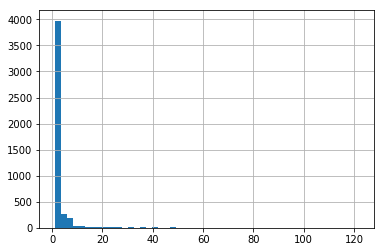

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['VideoId'].hist(bins=50)

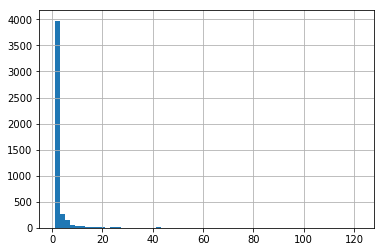

In [21]:
ratings['number_of_ratings'].hist(bins=60)

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


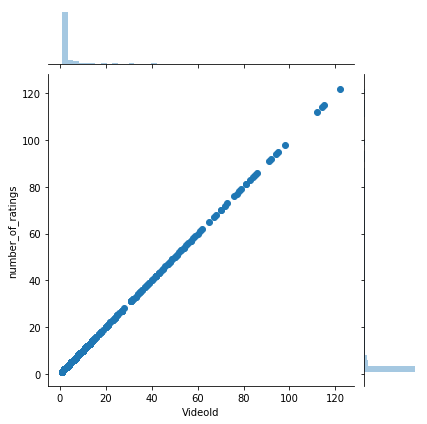

In [22]:
import seaborn as sns
sns.jointplot(x='VideoId', y='number_of_ratings', data=ratings)

In [23]:
video_matrix = ratings.pivot_table(index='UserId', columns='VideoId', values='number_of_ratings')
video_matrix.head()

F:\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'VideoId' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


VideoId,1,2,3,4,5,6,7,8,9,10,...,86,91,92,94,95,98,112,114,115,122
UserId,,,,,,,,,,,,,,,,,,,,,
00ee914cf7e4de6e8aa1c37c8dfc828b,1.0,2.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01205d384f0d28ea291cc7b1877b94fb,1.0,2.0,3.0,NaN,5.0,6.0,NaN,NaN,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
035de296486d20aed9650a4dc50dc10f,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
043659884f40e8af43e204e2bde306b2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06dc5d32342e463a35feef913d8a253b,1.0,2.0,3.0,4.0,NaN,6.0,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
rating = pd.DataFrame(merging.groupby('UserId')['VideoId'].value_counts())
rating.index.set_names(['UserId', 'VID'],inplace=True)  

In [26]:
rating.reset_index(inplace=True)  

In [27]:
rating.rename(columns={'VideoId':'Number_of_Ratings'},inplace=True)

In [28]:
rating

,UserId,VID,Number_of_Ratings
0,00ee914cf7e4de6e8aa1c37c8dfc828b,dba2bfaac0b48183b31d9328d3d71ba5,5
1,00ee914cf7e4de6e8aa1c37c8dfc828b,66acb1c6dfce53ba24a5662e5d9c1253,4
2,00ee914cf7e4de6e8aa1c37c8dfc828b,826e990372447fbeb52c655d47ada7af,4
3,00ee914cf7e4de6e8aa1c37c8dfc828b,b7caed763d2ce4140431c0fce607c1b2,4
4,00ee914cf7e4de6e8aa1c37c8dfc828b,3e808ec9a886535dc07264c0c692d920,3
5,00ee914cf7e4de6e8aa1c37c8dfc828b,963f72c05e44405637e3cd049689c8dd,3
6,00ee914cf7e4de6e8aa1c37c8dfc828b,b92cb0381d7be6d452b3e8168c5d9f41,3
7,00ee914cf7e4de6e8aa1c37c8dfc828b,c3368fb39af6c4c785d60d8a736db28f,3
8,00ee914cf7e4de6e8aa1c37c8dfc828b,ef2f8cc077424405c8d09031ad76ef92,3
9,00ee914cf7e4de6e8aa1c37c8dfc828b,efd2fd19defaf4fa2416914f91948ddc,3


In [29]:
video_matrix_revised = rating.pivot_table(index='UserId', columns='VID', values='Number_of_Ratings')
video_matrix_revised.head()

VID,005f0e9f7b0f110634f3b25711d8e4c2,0069536be5ac83d7ab75e355c1509f9d,00d546e1433516c0ab83d1511ee638bc,00f64ef90b339899b6854a7118d497de,00feba0aa20aa7f5a388ef6196025051,016557fc4a327d5359620b2873d46b26,0186ad705fc7e2ef5c93847aa26fe65d,01fdb98952863a107410bfb23c237af6,022f812c78d65aa855295370f34786ff,0293e8d6062e18d159dde8112f0b2649,...,fe1ce6e63b078bc4110edabd5b237305,fe450274074f580695d42d6a02d8cb20,fea6eb2c80a6f9d2ab1386bc05adb0f9,fee4a2ae78bff6b5cdca9c3003116d61,ff77b29a4367210ae618586c700d41b7,ff9b70b0e80552004d42ac19419ab1de,ffe15f453c0bd4ac1a450687f118c78a,ffe256d11a3fdecd58772e7dae50cc60,ffe7044026752991081c5664e12fe977,fffc6e567925a523e2943a711881e5ce
UserId,,,,,,,,,,,,,,,,,,,,,
00ee914cf7e4de6e8aa1c37c8dfc828b,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
01205d384f0d28ea291cc7b1877b94fb,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
035de296486d20aed9650a4dc50dc10f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
043659884f40e8af43e204e2bde306b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06dc5d32342e463a35feef913d8a253b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in userid:
  #print(i)
  df=df_video_started[df_video_started['UserId']==i]
  #print(df)
  df1.append(df)
  print(df1.shape)

In [ ]:
temp.head()

In [ ]:
pd.value_counts(df_video_started['UserId'].values<=50, sort=False)

In [30]:
df_app_lun=pd.read_csv('AppLaunched.csv')

In [31]:
df_app_lun.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,a27134c322d4f56dabc106a6847cb96b,20170106,0,4,50,1,1,2
1,aab39ad0874c59cc388525d511667f9d,20170106,0,8,40,1,1,2
2,f717dc3f757dc18cc0c3f27ed3e94ef8,20170106,0,12,35,1,1,2
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,20170106,0,20,40,1,2,2
4,71f05822bb699a04b694dd30265fdf73,20170106,0,20,35,1,1,2


In [ ]:
merge1=pd.merge(df_video_started,df_app_lun,how='inner',on='UserId')



In [ ]:
results1